In [13]:
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchi798/data-science-job-salaries")

print("Path to dataset files:", path)


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Path to dataset files: /root/.cache/kagglehub/datasets/ruchi798/data-science-job-salaries/versions/1


In [14]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
%matplotlib inline



In [15]:
df = pd.read_csv(path + "/ds_salaries.csv")
df

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 12 columns]

# Data Science Job Salaries

The dataset contains compensation details for several job titles within the field of data science from the years 2020 to 2022. It covers salary figures, employment type, company location, and other contextual details. This dataset seeks to offer insight into how characteristics such as job title, company size, and geographical location affect salaries in the data science industry.

## Collection Process

The creator of the dataset, Ruch Bhatia, compiled the data from publicly available job boards and anonymous submissions to platforms that collect salary data from professionals. It was further aggregated and curated to reflect trends across different years and roles.

### Implications of the Collection Method

- Voluntary Submission Bias - The data relies on voluntary contributions; there is a potential self-selection bias, meaning only individuals willing to share their salaries are represented. This may not accurately reflect the industry average and/or distribution.

- Geographical Bias - Most submissions appear to be from countries with active technology sectors (e.g. United States, Indida), which may limit the generalizability of findings to global trends.

- Limited Verification - There is no confirmation mechanism for the reported figures, which could lead to inaccurate or inflated salaries.

## Structure of the Dataset

- Filename - ds_salaries.csv

- Observations (rows) - 607

- Variables (columns) - 11

- Structure - Each row represents a unique job position or salary entry. Each column represents a specific attribute of that job

## Variable Descriptions

- work_year - The year the salary was reported (e.g., 2020 to 2022).

- experience_level - The level of professional experience: EN - Entry-level, MI - Mid-level, SE - Senior-level, EX - Executive-level

- employment_type - The type of employment contract: FT - Full-time, PT - Part-time, CT - Contract, FL - Freelance

- job_title - The specific title of the data-related job (e.g., Data Scientist, ML Engineer).

- salary - The reported gross annual salary in the original currency.

- salary_currency - The currency code (ISO 4217) of the original salary (e.g., USD, EUR, GBP).

- salary_in_usd - The converted annual salary in USD (standardized for comparison).

- employee_residence - The country where the employee resides.

- remote_ratio - The percentage of remote work: 0 - No remote, 50 - Hybrid, 100 - Fully remote

- company_location - The country where the employer is located.

- company_size - The size of the company: S - Small (<50 employees), M - Medium (50–250), L - Large (>250)

All variables contribute context to the salary data, helping identify trends based on employment settings, geography, and organizational structure.

<hr>

# Data Cleaning

## Inspect the Raw Data

In [18]:
print("Shape →", df.shape)
df.info()
df.describe()
df.nunique()

Shape → (607, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

## Drop Old Index Column

In [21]:
df = df.drop(columns=[c for c in df.columns if c.lower().startswith("unnamed")])

## Standardize Categorical Spellings

In [24]:
df["job_title"] = (
    df["job_title"]
    .str.strip()
    .str.title()
)

exp_map = {
    "EN": "Entry-level/Junior",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX": "Executive",
}
df["experience_level"] = df["experience_level"].map(exp_map)

df["employment_type"] = df["employment_type"].map(
    {"FT": "Full-time", "PT": "Part-time", "CT": "Contract", "FL": "Freelance"}
)

df["company_size"] = df["company_size"].map(
    {"S": "Small (<50)", "M": "Medium (50-249)", "L": "Large (250+)"}
)

df["remote_ratio"] = df["remote_ratio"].map(
    {0: "On-site", 50: "Hybrid", 100: "Fully remote"}
)

df["salary_currency"] = df["salary_currency"].str.upper()

## Handle Duplicates

In [27]:
before = len(df)
df = df.drop_duplicates()
print(f"Removed {before - len(df)} exact duplicate rows.")

Removed 42 exact duplicate rows.


## Correct dtypes

In [30]:
df = df.copy()                     

num_cols = ["salary", "salary_in_usd", "work_year"]
for col in num_cols:
    df.loc[:, col] = pd.to_numeric(df[col], errors="coerce")

cat_cols = [
    "experience_level",
    "employment_type",
    "job_title",
    "salary_currency",
    "employee_residence",
    "company_location",
    "company_size",
    "remote_ratio",
]
for col in cat_cols:
    df.loc[:, col] = df[col].astype("category")

## Check for Missing Values in the Variables

In [33]:
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])

Series([], dtype: int64)


## Save the Cleaned Dataset

In [36]:
clean_path = f"{path}/ds_salaries_cleaned.csv"
df.to_csv(clean_path, index=False)
print("Cleaned file written to →", clean_path)

Cleaned file written to → /root/.cache/kagglehub/datasets/ruchi798/data-science-job-salaries/versions/1/ds_salaries_cleaned.csv


In [11]:
df

work_year experience_level employment_type                   job_title  \
0         2020        Mid-level       Full-time              Data Scientist   
1         2020     Senior-level       Full-time  Machine Learning Scientist   
2         2020     Senior-level       Full-time           Big Data Engineer   
3         2020        Mid-level       Full-time        Product Data Analyst   
4         2020     Senior-level       Full-time   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022     Senior-level       Full-time               Data Engineer   
603       2022     Senior-level       Full-time               Data Engineer   
604       2022     Senior-level       Full-time                Data Analyst   
605       2022     Senior-level       Full-time                Data Analyst   
606       2022        Mid-level       Full-time                Ai Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0     70000             EUR          79833                 DE       On-site   
1    260000             USD         260000                 JP       On-site   
2     85000             GBP         109024                 GB        Hybrid   
3     20000             USD          20000                 HN       On-site   
4    150000             USD         150000                 US        Hybrid   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size  
0                 DE     Large (250+)  
1                 JP      Small (<50)  
2                 GB  Medium (50-249)  
3                 HN      Small (<50)  
4                 US     Large (250+)  
..               ...              ...  
602               US  Medium (50-249)  
603               US  Medium (50-249)  
604               US  Medium (50-249)  
605               US  Medium (50-249)  
606               US     Large (250+)  

[565 rows x 11 columns]

<hr>

In [12]:
count_per_year = df["work_year"].value_counts().sort_index()
print(count_per_year)



work_year
2020     72
2021    215
2022    278
Name: count, dtype: int64


# Exploratory Data Analysis

To gain a good understanding of our Data Science Job Salaries Dataset, this part of the notebook will explore the different information contained, as factors related to salary. The results from this analysis will be used to decide what kind of research question we can ask and try to answer through Data Modeling techniques.

To observe the relationship between these two variables, we can group our df by experience_level and describe the dataset based on salary_in_usd.

## EDA Question 1: How does the work_year impact the average salary in USD?

To understand how salaries evolve across the years, we can group the dataset by work_year  and compute summary statistics for salary_in_usd. This will give us an overview of central tendencies and dispersion across different years.

In [13]:
yearly_stats = df.groupby("work_year").describe()["salary_in_usd"]

yearly_stats["IQR"] = yearly_stats["75%"] - yearly_stats["25%"]
yearly_stats["variance"] = yearly_stats["std"] ** 2
yearly_stats

count           mean           std      min      25%       50%  \
work_year                                                                   
2020        72.0   95813.000000  82831.799222   5707.0  45724.5   75544.0   
2021       215.0   99430.413953  80304.317444   2859.0  50000.0   82528.0   
2022       278.0  123089.097122  59888.932893  10000.0  78791.0  120000.0   

                75%       max      IQR      variance  
work_year                                             
2020       115526.0  450000.0  69801.5  6.861107e+09  
2021       135000.0  600000.0  85000.0  6.448783e+09  
2022       160000.0  405000.0  81209.0  3.586684e+09

### Question 1 Visualizations

To clearly observe how salaries evolve across years, we can generate both line charts and boxplots.

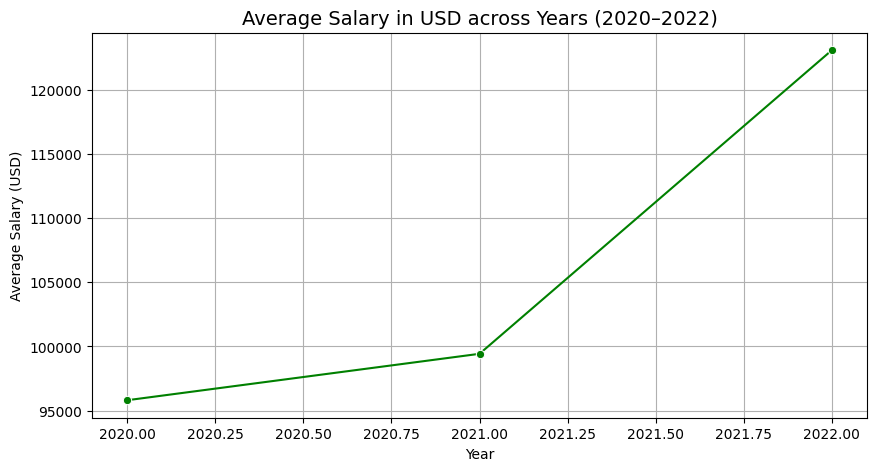

In [14]:
avg_salary_by_year = df.groupby("work_year")["salary_in_usd"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_salary_by_year, x="work_year", y="salary_in_usd", marker="o", color="green")
plt.title("Average Salary in USD across Years (2020–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.grid(True)
plt.show()

The plot illustrates the trend in average salaries over three years (2020–2022), highlighting a gradual rise from roughly $95,800 in 2020 to approximately $123,100 in 2022. This shift suggests that while salaries remained relatively stable during the pandemic, the post‑pandemic recovery and growing demand for data-related roles led to a significant rise in average compensation. Some further insights derived from the plot include:

* **Consistent Growth Pattern**
    * The average salary increased steadily from roughly USD 95,800 in 2020 to roughly USD 99,430 in 2021, followed by a significant jump to roughly USD 123,089 in 2022.

* **Possible Impacts of the Pandemic**
    * The relatively lower salaries in 2020 align with the height of the pandemic, when economic uncertainty and hiring freezes were prevalent across many industries, including tech and data roles.

* **Post‑Pandemic Recovery and Surge**
    * By 2022, as businesses adapted to remote and digital-first strategies, demand for data professionals surged. This shift is reflected in the noticeable rise in average salaries, suggesting a stronger market and higher compensation to attract critical talent.


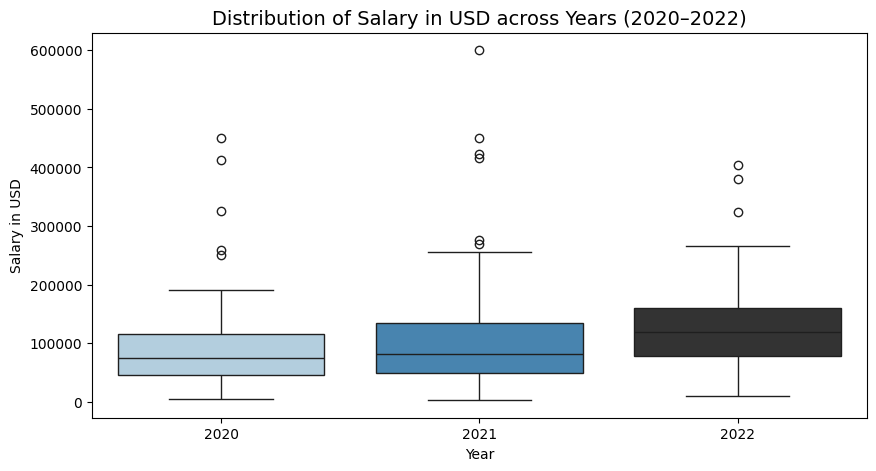

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="work_year", y="salary_in_usd", 
            hue="work_year",  # uses work_year for color assignment
            dodge=False,     
            palette="Blues_d", 
            legend=False)     
plt.title("Distribution of Salary in USD across Years (2020–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Salary in USD")
plt.show()


The box plot compares the distribution of salaries across three years (2020–2022), showing a noticeable upward shift in central tendency and range over time. Median salaries rise from roughly $75,500 in 2020 to $120,000 in 2022, highlighting a significant increase in typical pay as the data field evolved post‑pandemic.

* **Rising Central Tendency**
    * The median salary increased sharply from approximately 75,544 in 2020 to 120,000 in 2022, indicating that typical salaries grew significantly as market conditions recovered post‑pandemic.

* **Increasing Variability**
    * The Interquartile Range (IQR), which captures the middle 50% of salaries, grew from roughly 69,800 in 2020 to roughly 81,209 in 2022. This suggests that salary distribution became more dispersed over time, highlighting a broader range of roles and compensation packages

* **Higher Extremes and Outliers**
    * The maximum salary rose from 450,000 in 2020 to 600,000 in 2021 and 405,000 in 2022, suggesting the presence of high‑earning outliers, especially in the post‑pandemic period when demand for senior roles surged.

* **Decline in Variance**
    * Variance dropped from roughly 6.86 billion in 2020 to 3.59 billion in 2022, implying that despite the higher salaries and wider IQR, salaries became relatively more clustered as the market matured and standardized for certain roles and experience levels.

## EDA Question 2: Is it safe to slice the data annually? What are the differences & relationships between the years 2020, 2021, and 2022?

### Question 2 Visualizations

Mean (95 % CI by normal theory)

In [16]:
summary = (
    df.groupby("work_year")["salary_in_usd"]
    .agg(
        n="count",
        mean="mean",
        std="std"
    )
    .reset_index()
)
summary["se"] = summary["std"] / np.sqrt(summary["n"])
summary["ci95_low"] = summary["mean"] - 1.96 * summary["se"]
summary["ci95_high"] = summary["mean"] + 1.96 * summary["se"]
summary_rounded = summary.round({"mean": 0, "std": 0, "se": 0})
summary_rounded

work_year    n      mean      std      se       ci95_low      ci95_high
0       2020   72   95813.0  82832.0  9762.0   76679.830537  114946.169463
1       2021  215   99430.0  80304.0  5477.0   88696.064327  110164.763580
2       2022  278  123089.0  59889.0  3592.0  116048.974100  130129.220144

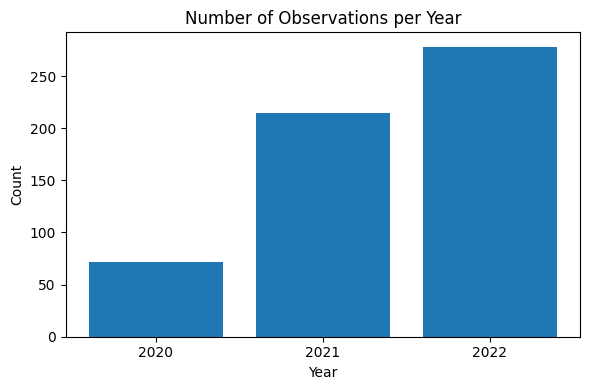

In [17]:
plt.figure(figsize=(6,4))
plt.bar(summary["work_year"].astype(str), summary["n"])
plt.title("Number of Observations per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

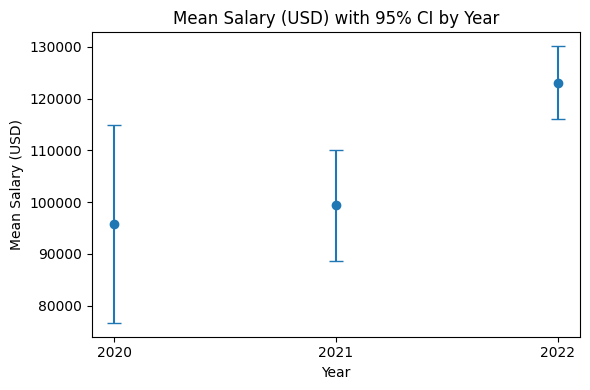

In [18]:
plt.figure(figsize=(6,4))
plt.errorbar(
    summary["work_year"].astype(str),
    summary["mean"],
    yerr=1.96 * summary["se"],
    fmt='o', capsize=5
)
plt.title("Mean Salary (USD) with 95% CI by Year")
plt.xlabel("Year")
plt.ylabel("Mean Salary (USD)")
plt.tight_layout()
plt.show()

Outliers directly affect both the dot (mean) and the CI length (via a larger SD). 2020’s mean is noticeably inflated by a few $400 k – $600 k salaries, and its CI (± ≈ $18 k) is widest because n = 72 is the smallest year slice.

<hr>

5 % Trimmed Mean (95 % CI)

In [19]:
trim_rows = []

for yr, grp in df.groupby("work_year"):
    s = grp["salary_in_usd"].dropna()
    # keep middle 90 %
    lower, upper = s.quantile(0.05), s.quantile(0.95)
    trimmed = s[(s >= lower) & (s <= upper)]

    n  = trimmed.size
    tm = trimmed.mean()
    sd = trimmed.std(ddof=1)
    se = sd / np.sqrt(n)                 # CLT on trimmed data
    ci_low, ci_high = tm - 1.96*se, tm + 1.96*se

    trim_rows.append([yr, grp.size, n, tm, ci_low, ci_high])

trim_summary = pd.DataFrame(
    trim_rows,
    columns=["work_year", "n_total", "n_used", "trim_mean",
             "ci95_low", "ci95_high"]
).round(0)
trim_summary

work_year  n_total  n_used  trim_mean  ci95_low  ci95_high
0       2020      792      64    84776.0   73124.0    96428.0
1       2021     2365     195    90613.0   83178.0    98049.0
2       2022     3058     250   120613.0  114877.0   126348.0

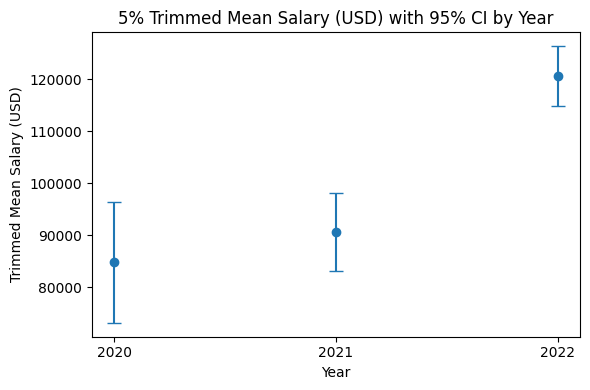

In [20]:
plt.figure(figsize=(6,4))
plt.errorbar(
    trim_summary["work_year"].astype(str),
    trim_summary["trim_mean"],
    yerr=[trim_summary["trim_mean"] - trim_summary["ci95_low"],
          trim_summary["ci95_high"] - trim_summary["trim_mean"]],
    fmt='o', capsize=5
)
plt.title("5% Trimmed Mean Salary (USD) with 95% CI by Year")
plt.xlabel("Year")
plt.ylabel("Trimmed Mean Salary (USD)")
plt.tight_layout()
plt.show()

Drops the lowest + highest 5 % of salaries each year, then averages the remaining 90 %. This shrinks 2020’s centre from ≈ $96 k → $85 k and narrows its CI to ± ≈ $11 k. The trimmed mean preserves the intuitive feel of “average pay” while muting the leverage of extreme rows.

<hr>

Median (95 % CI)

In [21]:
med_rows = []

for yr, grp in df.groupby("work_year"):
    s  = grp["salary_in_usd"].dropna()
    n  = s.size
    md = np.median(s)

    #approx SE of median ≈ 1.253 * SD / square root of n,,,
    sd = s.std(ddof=1)
    se = 1.253 * sd / np.sqrt(n)
    ci_low, ci_high = md - 1.96*se, md + 1.96*se

    med_rows.append([yr, n, md, ci_low, ci_high])

med_summary = pd.DataFrame(
    med_rows,
    columns=["work_year", "n", "median", "ci95_low", "ci95_high"]
).round(0)
med_summary

work_year    n    median  ci95_low  ci95_high
0       2020   72   75544.0   51570.0    99518.0
1       2021  215   82528.0   69078.0    95978.0
2       2022  278  120000.0  111179.0   128821.0

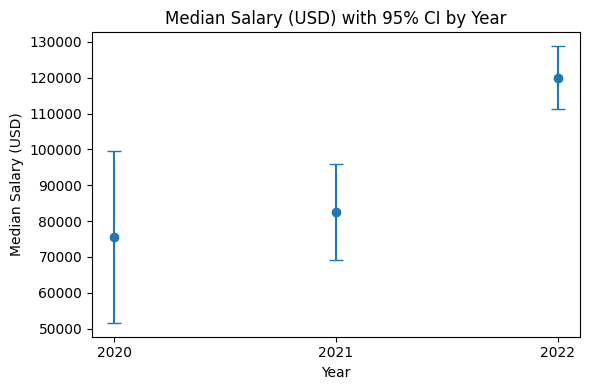

In [22]:




plt.figure(figsize=(6,4))
plt.errorbar(
    med_summary["work_year"].astype(str),
    med_summary["median"],
    yerr=[med_summary["median"] - med_summary["ci95_low"],
          med_summary["ci95_high"] - med_summary["median"]],
    fmt='o', capsize=5
)
plt.title("Median Salary (USD) with 95% CI by Year")
plt.xlabel("Year")
plt.ylabel("Median Salary (USD)")
plt.tight_layout()
plt.show()

The median is the 50-th percentile which is immune to outliers. Because it uses only ranks, its CI is widest when n is small; 2020’s band spans about $40 k.

### How the three measures relate?

| Year | Mean (USD)  | 5 % Trimmed Mean (USD) | Median (USD) | Explanation                                                                          |
| ---- | ----------- | ---------------------- | ------------ | ----------------------------------------------------------------------------------------- |
| 2020 | 96 k ± 18 k | 85 k ± 11 k            | 76 k ± 20 k  | Outliers lift the raw mean; trimmed mean and median reveal lower “typical” pay.           |
| 2021 | 99 k ± 11 k | 90 k ± 7 k             | 83 k ± 9 k   | Same pattern: right-tail earners push mean > median.                                      |
| 2022 | 123 k ± 8 k | 121 k ± 6 k            | 120 k ± 6 k  | Distribution is more symmetric; all three converge and CIs are tight thanks to *n* = 278. |


- Mean tracks the overall payroll burden - good for corporate finance questions.

- Trimmed mean is a robust average - ideal for modeling without discarding too much data.

- Median captures the typical individual’s income - best for employee-centered insights.

### Can the dataset be sliced by year?

2022

278 rows push well past the “rule-of-30” for almost any classical test; even a 10-way stratification leaves ≈ 28 obs per cell. All estimators (mean, trimmed mean, median) give 95 % CIs under ± 8 k, or < 7 % of the centre. No empty cells across common categorical drivers, so nothing gets silently dropped in regression models.

Verdict: 2022 can be sliced without worrying about statistical fragility.

2021

n = 215 is still ample for main-effect models. However, the smallest cells dip to single digits when three-way interactions (e.g., experience × remote × size) are layered in. The mean CI is ± 11 k; the trimmed mean is ± 7 k. It's tight enough to detect ≥ 10 k differences but may blur subtler effects (e.g., junior vs. mid-level pay gaps of ~5 k).

Verdict: 2021 can be analyzed separately, but consider merging it with 2022 for a layered interaction.

2020

Hiring freezes and a few very high hazard pay salaries produce a fat-tailed distribution. The sample size of n = 72 leaves wide CIs; dropping a single $450k outlier shifts the mean by > $6k (≈ 7%). Over one-third of the 27 combo cells are empty; any model with those factors silently discards 20–40 % of 2020 rows. 

Verdict: Keep 2020 only for visual context (pandemic dip) or an “early-pandemic” outlier. Avoid standalone significance tests inside 2020; power is low and Type II errors are likely.

| Analysis                                         | 2020                             | 2021                                      | 2022               |
| ----------------------------------------------------- | -------------------------------- | ----------------------------------------- | ------------------ |
| **High-level descriptives** (line/box plots, medians) | ✔ (with outlier note)            | ✔                                         | ✔                  |
| **Main-effect regression** (≤ 2 categorical drivers)  | ✔ (pooled with dummy)            | ✔ (stand-alone OK)                        | ✔                  |
| **Fine-grained cross-tabs / 3-way interactions**      | ✘ (unstable)                     | ↔ merge with 2022 or collapse rare levels | ✔                  |
| **Presentation focus**                                | Pandemic | Transitional year                         | Core evidence year |


Slice 2022 and 2021 freely for detailed insights, pool them (or use a work_year dummy) for modeling, and/or treat 2020 as an outlier

## EDA Question 3: Did the remote-work salary widen from 2021 to 2022?

### Question 3 Visualizations

In [23]:
df_stable = df[df["work_year"].isin([2021, 2022])].copy()

med_remote = (
    df_stable.pivot_table(
        values="salary_in_usd",
        index="work_year",
        columns="remote_ratio",
        aggfunc="median"
    )
    .reindex([2021, 2022])          # ensure correct row order
    .round(0)
)

med_remote["remote_premium_abs"] = med_remote["Fully remote"] - med_remote["On-site"]
med_remote["remote_premium_pct"] = (
    med_remote["remote_premium_abs"] / med_remote["On-site"] * 100
).round(1)

med_remote

remote_ratio  Fully remote   Hybrid   On-site  remote_premium_abs  \
work_year                                                           
2021               91500.0  63831.0   80916.0             10584.0   
2022              123595.0  90065.0  110900.0             12695.0   

remote_ratio  remote_premium_pct  
work_year                         
2021                        13.1  
2022                        11.4

Companies spent more real money to secure fully-remote talent in 2022. This is seen from the absolute dollar gap of +$ 2.1 k (from $10.6 k → $12.7 k). Moreover, on-site salaries rose faster in relative terms, so the proportional premium narrowed slightly by  1.7 pp (from 13.1 % → 11.4 %).

In [24]:
plt.figure(figsize=(8,5))
med_remote.drop(columns=["remote_premium_abs", "remote_premium_pct"]).plot(
    kind="bar", edgecolor="black", width=0.8
)
plt.title("Median Salary by Remote Arrangement (2021 vs 2022)")
plt.xlabel("Work Year")
plt.ylabel("Median Salary (USD)")
plt.legend(title="Remote Mode", loc="upper left")
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

In 2021, it is noticeable that:

- The On-site bar is higher than Hybrid but clearly shorter than Fully remote.

- The Fully remote bar stands out as the tallest, confirming that remote jobs had a pay edge.

Moving to 2022, all three bars are taller, showing that salaries rose across the board.
But the pattern shifted subtly:

- On-site pay increased substantially, narrowing the visual gap with Fully remote.

- Hybrid pay jumped even more in relative terms, almost catching up to On-site.

This means that while Fully remote is still the highest, the difference between on-site and fully remote shrank proportionally, even though the dollar gap grew. In raw dollars, remote work continued to lead, and its advantage grew from ~$10.6k to ~$12.7k. However, the percentage gap, which is evident in the proportional height of the bar, slightly decreased. The result reflects a market adjusting as remote work became mainstream and companies increased in-office pay to stay competitive.

The chart illustrates that while remote work remained the best-paid option in 2022, the relative gap shrank as on-site salaries caught up faster, and the absolute pay difference continued to increase.

## EDA Question 4: How do `experience_level`, and `company_size` collectively influence salary in USD from 2021-2022?

### Question 4 Visualizations

In [25]:
df.experience_level.value_counts()

experience_level
Senior-level          243
Mid-level             208
Entry-level/Junior     88
Executive              26
Name: count, dtype: int64

In [26]:
df_plot = df.copy()
df_2021 = df_plot[df_plot['work_year'] == 2021]
df_2022 = df_plot[df_plot['work_year'] == 2022]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for 2021
sns.stripplot(
    data=df_2021,
    x='experience_level',
    y='salary_in_usd',
    hue='company_size',
    jitter=0.3,
    dodge=True,
    alpha=0.6,
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title("Salaries by Experience Level and Company Size (2021)")
axes[0].set_xlabel("Experience Level")
axes[0].set_ylabel("Salary in USD")
axes[0].legend_.remove() 

sns.stripplot(
    data=df_2022,
    x='experience_level',
    y='salary_in_usd',
    hue='company_size',
    jitter=0.3,
    dodge=True,
    alpha=0.6,
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title("Salaries by Experience Level and Company Size (2022)")
axes[1].set_xlabel("Experience Level")
axes[1].set_ylabel("")  
axes[1].legend(title="Company Size", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

This plot allows us to make some key observations across all four experience levels and three company size categories

1. **Entry Level/Junior**
    * Salaries are generally lower, with most data points within this category below 100,000 USD.

2. **Mid-level**
    * Salaries in the mid-level experience level now show a wider spread, althought it is more dense just below the 100,000 mark, most of it still being under the 100,000 - 120,000 mark
    * Medium and Large sized companies appear to offer more salaries to mid-level experience employees rather than small-sized companies

3. **Senior-level**
    * Salaries are higher, with it being more dense in the 100,000-200,000 range
    * Medium companies seem to hire more employees with Senior-level experience than other sized companies
    * In 2022, we can see that there is a big difference in the amount of senior-level employees being hired by medium-sized companies as opposed to small and large sized companies

4. **Executive**
    * It seems that the number of data points for employees with this experience level is quite sparse in both years

>**Low Outliers**: Interestingly, there are some data points, particularly at senior and executive levels, that appear relatively low compared to others at the same experience level. This could indicate a wide range of roles within each "level" (which may be seen in `job_title`) or other influencing factors.

<hr>

## EDA Question 5: While categorizing Data Science Jobs into 5 categories (Data Science, ML/AI, Data Engineering/Architecture, Data Analytics/BI, and Data Leadership/Management), how does job category influence median job salaries during 2021-2022?

### Categorizing the data into their respective job categories

In [4]:
def categorize_job_title(job_title):

    ds_keywords = [
        'data scientist', 'research scientist', 'applied data scientist',
        'staff data scientist', 'data science consultant', 'data science engineer'
    ]

    ml_keywords = [
        'machine learning engineer', 'ai scientist', 'machine learning scientist',
        'applied machine learning scientist', 'machine learning developer', 
        'computer vision engineer', 'ml engineer', 'computer vision software engineer',
        'nlp engineer', 'lead machine learning engineer',
        '3d computer vision researcher', 'machine learning manager', 
        'machine learning infrastructure engineer' 
    ]

    de_arch_keywords = [
        'data engineer', 'big data engineer', 'data architect', 'lead data engineer',
        'cloud data engineer', 'etl developer', 'big data architect'
    ]

    da_keywords = [
        'data analyst', 'bi data analyst', 'business data analyst',
        'data analytics engineer', 'analytics engineer', 'lead data analyst',
        'product data analyst', 'financial data analyst',
        'marketing data analyst', 'data specialist', 'finance data analyst',
        'data analytics lead', 'data analytics manager'
    ]

    leadership_management_keywords = [
        'data science manager', 'director of data science', 'head of data',
        'data engineering manager', 'head of data science',
        'director of data engineering', 'machine learning manager',
        'head of machine learning', 'principal data scientist', 'principal data engineer',
        'principal data analyst'
    ]

    if any(keyword in job_title for keyword in ds_keywords):
        return "Data Science"
    elif any(keyword in job_title for keyword in ml_keywords):
        return "Machine Learning / AI"
    elif any(keyword in job_title for keyword in de_arch_keywords):
        return "Data Engineering / Architecture"
    elif any(keyword in job_title for keyword in da_keywords):
        return "Data Analytics / Business Intelligence"
    elif any(keyword in job_title for keyword in leadership_management_keywords):
        return "Leadership / Management"
    else:
        return "Other"

In [39]:
eda5_df = df[df['work_year'].isin([2021, 2022])].copy()
eda5_df['job_title'] = eda5_df['job_title'].str.lower()
eda5_df['job_category'] = eda5_df['job_title'].apply(categorize_job_title)

eda5_df

work_year    experience_level employment_type           job_title  \
72        2021  Entry-level/Junior       Full-time  research scientist   
73        2021           Executive       Full-time     bi data analyst   
74        2021           Executive       Full-time        head of data   
75        2021        Senior-level       Full-time      data scientist   
76        2021           Mid-level       Full-time     bi data analyst   
..         ...                 ...             ...                 ...   
602       2022        Senior-level       Full-time       data engineer   
603       2022        Senior-level       Full-time       data engineer   
604       2022        Senior-level       Full-time        data analyst   
605       2022        Senior-level       Full-time        data analyst   
606       2022           Mid-level       Full-time        ai scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
72    60000             GBP          82528                 GB        Hybrid   
73   150000             USD         150000                 IN  Fully remote   
74   235000             USD         235000                 US  Fully remote   
75    45000             EUR          53192                 FR        Hybrid   
76   100000             USD         100000                 US  Fully remote   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size                            job_category  
72                GB     Large (250+)                            Data Science  
73                US     Large (250+)  Data Analytics / Business Intelligence  
74                US     Large (250+)                 Leadership / Management  
75                FR     Large (250+)                            Data Science  
76                US  Medium (50-249)  Data Analytics / Business Intelligence  
..               ...              ...                                     ...  
602               US  Medium (50-249)         Data Engineering / Architecture  
603               US  Medium (50-249)         Data Engineering / Architecture  
604               US  Medium (50-249)  Data Analytics / Business Intelligence  
605               US  Medium (50-249)  Data Analytics / Business Intelligence  
606               US     Large (250+)                   Machine Learning / AI  

[493 rows x 12 columns]

### Question 5 Visualizations

In [29]:
median_salaries = eda5_df.groupby(['work_year', 'job_category'])['salary_in_usd'].median().reset_index()

median_2021 = median_salaries[median_salaries['work_year'] == 2021].sort_values('salary_in_usd')
median_2022 = median_salaries[median_salaries['work_year'] == 2022].sort_values('salary_in_usd')

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

sns.barplot(
    data=median_2021,
    x='job_category',
    y='salary_in_usd',
    hue='job_category',       
    palette='Blues_d',
    legend=False,             
    ax=axes[0]
)
axes[0].set_title('Median Salary by Job Category (2021)', fontsize=14)
axes[0].set_xlabel('Job Category')
axes[0].set_ylabel('Median Salary (USD)')
axes[0].tick_params(axis='x', rotation=20)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)

sns.barplot(
    data=median_2022,
    x='job_category',
    y='salary_in_usd',
    hue='job_category',       
    palette='Blues_d',
    legend=False,             
    ax=axes[1]
)

axes[1].set_title('Median Salary by Job Category (2022)', fontsize=14)
axes[1].set_xlabel('Job Category')
axes[1].set_ylabel('Median Salary (USD)')
axes[1].tick_params(axis='x', rotation=20)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


These two plots gives us an insight into how the median job salary in 2021 and 2022 are influenced by the job category. Through this, we can pinpoint variables such as the spread of salaries across the job categories, and then compare them between 2021 and 2022 to see the shifts in trends of demand of Data Science professionals during the post-pandemic years. From these visualizations, we were able to garner the following insights:

* A common factor between the 2 years is that jobs within the `Leadership/Management` category have the highest median salary.
* All job categories had an increase of ≥20,000 USD from 2021 to 2022.
* The `Data Science` job category had the highest jump from 2021 to 2022. In 2021, the median salary for that category was just below 80,000 USD. In 2022, the median salary for the `Data Science` job category jumped up to the second highest, with an average job salary of ~138,000 USD.
* The spread between the median salaries of all job categories have decreased in 2022 as a result of all of them jumping into the 6-digit salary range. This implies that the demand for data science professioanals across all specializations within the field are growing.

<hr>

# Research Question

## For distinct categories of data-related roles (Data Science/ML, Data Engineering/Architecture, Data Analytics/BI, and Data Leadership/Management), does the relationship between experience_level and salary_in_usd significantly vary based on company_size,  remote_ratio (on-site, hybrid, or fully remote), and whether the company_location is in an established tech hub versus other regions, between 2021 and 2022?

## Additional Preprocessing Steps

### Filtering the Dataframe to only include rows from 2021 to 2022

todo: explain why - not sure about this , but i think this is what i understood from the eda questions 

In [30]:
df_2021_2022 = df[df["work_year"].isin([2021, 2022])]
df_2021_2022

work_year    experience_level employment_type           job_title  \
72        2021  Entry-level/Junior       Full-time  Research Scientist   
73        2021           Executive       Full-time     Bi Data Analyst   
74        2021           Executive       Full-time        Head Of Data   
75        2021        Senior-level       Full-time      Data Scientist   
76        2021           Mid-level       Full-time     Bi Data Analyst   
..         ...                 ...             ...                 ...   
602       2022        Senior-level       Full-time       Data Engineer   
603       2022        Senior-level       Full-time       Data Engineer   
604       2022        Senior-level       Full-time        Data Analyst   
605       2022        Senior-level       Full-time        Data Analyst   
606       2022           Mid-level       Full-time        Ai Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
72    60000             GBP          82528                 GB        Hybrid   
73   150000             USD         150000                 IN  Fully remote   
74   235000             USD         235000                 US  Fully remote   
75    45000             EUR          53192                 FR        Hybrid   
76   100000             USD         100000                 US  Fully remote   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size  
72                GB     Large (250+)  
73                US     Large (250+)  
74                US     Large (250+)  
75                FR     Large (250+)  
76                US  Medium (50-249)  
..               ...              ...  
602               US  Medium (50-249)  
603               US  Medium (50-249)  
604               US  Medium (50-249)  
605               US  Medium (50-249)  
606               US     Large (250+)  

[493 rows x 11 columns]

### Categorizing data points into job categories

The raw `job_title` column contains many variations, by grouping them into categories based on specialization we create a new feature `job_category`, which will help our analyses by providing a structured variable to compare characteristics across role types, reducing noise from the `job_title` column.

In [31]:
df_2021_2022['job_title'] = df_2021_2022['job_title'].str.lower()
df_2021_2022['job_category'] = df_2021_2022['job_title'].apply(categorize_job_title)
df_2021_2022

/tmp/ipykernel_738/2965407298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_2022['job_title'] = df_2021_2022['job_title'].str.lower()
/tmp/ipykernel_738/2965407298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_2022['job_category'] = df_2021_2022['job_title'].apply(categorize_job_title)


work_year    experience_level employment_type           job_title  \
72        2021  Entry-level/Junior       Full-time  research scientist   
73        2021           Executive       Full-time     bi data analyst   
74        2021           Executive       Full-time        head of data   
75        2021        Senior-level       Full-time      data scientist   
76        2021           Mid-level       Full-time     bi data analyst   
..         ...                 ...             ...                 ...   
602       2022        Senior-level       Full-time       data engineer   
603       2022        Senior-level       Full-time       data engineer   
604       2022        Senior-level       Full-time        data analyst   
605       2022        Senior-level       Full-time        data analyst   
606       2022           Mid-level       Full-time        ai scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
72    60000             GBP          82528                 GB        Hybrid   
73   150000             USD         150000                 IN  Fully remote   
74   235000             USD         235000                 US  Fully remote   
75    45000             EUR          53192                 FR        Hybrid   
76   100000             USD         100000                 US  Fully remote   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size                            job_category  
72                GB     Large (250+)                            Data Science  
73                US     Large (250+)  Data Analytics / Business Intelligence  
74                US     Large (250+)                 Leadership / Management  
75                FR     Large (250+)                            Data Science  
76                US  Medium (50-249)  Data Analytics / Business Intelligence  
..               ...              ...                                     ...  
602               US  Medium (50-249)         Data Engineering / Architecture  
603               US  Medium (50-249)         Data Engineering / Architecture  
604               US  Medium (50-249)  Data Analytics / Business Intelligence  
605               US  Medium (50-249)  Data Analytics / Business Intelligence  
606               US     Large (250+)                   Machine Learning / AI  

[493 rows x 12 columns]

### Tech Hub Binning

To capture potential regional salary advantages, we created a binary feature company_location_tech_hub that identifies whether a job's company is located in a globally recognized tech hub. The list of tech hubs was based on external domain knowledge, referencing countries frequently cited as technology and innovation centers.

The new feature assigns a value of 1 to companies based in countries like the US, Germany (DE), China (CN), and others commonly associated with strong tech ecosystems, and 0 otherwise. This binning allows the models to account for geographic influence on salary without introducing too many sparse country-level categories. It simplifies the location signal and helps answer the research question by isolating whether being in a tech-centric environment affects salary outcomes.

todo: explanation

In [32]:
# based on the top 10 tech hubs in the world
# source: domain knowledge -https://allenrec.com/technology-hub-countries/

tech_hubs = ['US', 'DE', 'CN', 'FR', 'NL', 'ES', 'JP', 'AU']

# bin the company_location column
df_2021_2022['company_location_tech_hub'] = df_2021_2022['company_location'].apply(lambda x: 1 if x in tech_hubs else 0)

df_2021_2022

/tmp/ipykernel_738/1094335165.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_2022['company_location_tech_hub'] = df_2021_2022['company_location'].apply(lambda x: 1 if x in tech_hubs else 0)


work_year    experience_level employment_type           job_title  \
72        2021  Entry-level/Junior       Full-time  research scientist   
73        2021           Executive       Full-time     bi data analyst   
74        2021           Executive       Full-time        head of data   
75        2021        Senior-level       Full-time      data scientist   
76        2021           Mid-level       Full-time     bi data analyst   
..         ...                 ...             ...                 ...   
602       2022        Senior-level       Full-time       data engineer   
603       2022        Senior-level       Full-time       data engineer   
604       2022        Senior-level       Full-time        data analyst   
605       2022        Senior-level       Full-time        data analyst   
606       2022           Mid-level       Full-time        ai scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
72    60000             GBP          82528                 GB        Hybrid   
73   150000             USD         150000                 IN  Fully remote   
74   235000             USD         235000                 US  Fully remote   
75    45000             EUR          53192                 FR        Hybrid   
76   100000             USD         100000                 US  Fully remote   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size                            job_category  \
72                GB     Large (250+)                            Data Science   
73                US     Large (250+)  Data Analytics / Business Intelligence   
74                US     Large (250+)                 Leadership / Management   
75                FR     Large (250+)                            Data Science   
76                US  Medium (50-249)  Data Analytics / Business Intelligence   
..               ...              ...                                     ...   
602               US  Medium (50-249)         Data Engineering / Architecture   
603               US  Medium (50-249)         Data Engineering / Architecture   
604               US  Medium (50-249)  Data Analytics / Business Intelligence   
605               US  Medium (50-249)  Data Analytics / Business Intelligence   
606               US     Large (250+)                   Machine Learning / AI   

     company_location_tech_hub  
72                           0  
73                           1  
74                           1  
75                           1  
76                           1  
..                         ...  
602                          1  
603                          1  
604                          1  
605                          1  
606                          1  

[493 rows x 13 columns]

### Handling Outliers

In [33]:
import seaborn as sns

sns.boxplot(x=df_2021_2022["salary_in_usd"])
plt.title("Box Plot of Salary in USD")
plt.show()


The box plot of salary_in_usd revealed the presence of extreme outliers, primarily in the upper tail of the salary distribution. Using the interquartile range (IQR) method, we identified 7 salaries that fell significantly outside the normal range, exceeding 1.5×IQR above the third quartile. These outliers had salaries ranging from $324,000 to $600,000 USD, mostly tied to senior or executive-level roles.

In [34]:
Q1 = df_2021_2022["salary_in_usd"].quantile(0.25)
Q3 = df_2021_2022["salary_in_usd"].quantile(0.75)
IQR = Q3 - Q1

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Select outlier rows
outliers = df_2021_2022[
    (df_2021_2022["salary_in_usd"] < lower_bound) |
    (df_2021_2022["salary_in_usd"] > upper_bound)
]

outliers

work_year experience_level employment_type  \
97        2021        Mid-level       Full-time   
157       2021        Mid-level       Full-time   
225       2021        Executive        Contract   
252       2021        Executive       Full-time   
482       2022        Executive       Full-time   
519       2022     Senior-level       Full-time   
523       2022     Senior-level       Full-time   

                              job_title  salary salary_currency  \
97               financial data analyst  450000             USD   
157  applied machine learning scientist  423000             USD   
225            principal data scientist  416000             USD   
252             principal data engineer  600000             USD   
482                       data engineer  324000             USD   
519              applied data scientist  380000             USD   
523                 data analytics lead  405000             USD   

     salary_in_usd employee_residence  remote_ratio company_location  \
97          450000                 US  Fully remote               US   
157         423000                 US        Hybrid               US   
225         416000                 US  Fully remote               US   
252         600000                 US  Fully remote               US   
482         324000                 US  Fully remote               US   
519         380000                 US  Fully remote               US   
523         405000                 US  Fully remote               US   

        company_size                            job_category  \
97      Large (250+)  Data Analytics / Business Intelligence   
157     Large (250+)                   Machine Learning / AI   
225      Small (<50)                            Data Science   
252     Large (250+)         Data Engineering / Architecture   
482  Medium (50-249)         Data Engineering / Architecture   
519     Large (250+)                            Data Science   
523     Large (250+)  Data Analytics / Business Intelligence   

     company_location_tech_hub  
97                           1  
157                          1  
225                          1  
252                          1  
482                          1  
519                          1  
523                          1

### Removal of Outliers

In [35]:
# remoe the outliers from df_2021_2022, based on the outliers dataframe
print(f"Before: {len(df_2021_2022)} rows")
df_2021_2022 = df_2021_2022.drop(outliers.index)
print(f"After: {len(df_2021_2022)} rows")

Before: 493 rows
After: 486 rows


### Justification for the Removal of Outliers

Given that the total dataset only contains 493 rows, and that outliers represent less than 1.5% of the data, their removal was carefully considered. These high-end outliers have the potential to distort the model's training process, inflate RMSE, and cause skewed coefficient estimates in linear and polynomial regression. More importantly, they could misrepresent the general salary patterns for most data-related roles, which are concentrated in a lower range.

Removing these outliers reduced the dataset to 486 rows, preserving the integrity of the sample while hoping to improve model stability. This step ensures that our analysis focuses on typical salary ranges and avoids misleading predictions driven by rare, high-compensation extreme cases.

### Model Features and Label Setup

To prepare the dataset for modeling, we selected a set of relevant categorical features based on the research question: experience_level, company_size, remote_ratio, and company_location_tech_hub. The target variable salary_in_usd was selected as the label we aim to predict.

In [36]:
X = df_2021_2022[[
    'experience_level',
    'company_size',
    'remote_ratio',
    'company_location_tech_hub',
    'job_category'
]]

y = df_2021_2022['salary_in_usd']

### Dummy Encoding Features

Since the selected features are categorical, we used one-hot encoding via pd.get_dummies() to convert them into binary variables suitable for regression. The drop_first=True parameter avoids multicollinearity by excluding one category per feature. This encoding allows models to interpret each category as a separate independent variable during training.

In [37]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [38]:
X_encoded

company_location_tech_hub  experience_level_Executive  \
72                           0                       False   
73                           1                        True   
74                           1                        True   
75                           1                       False   
76                           1                       False   
..                         ...                         ...   
602                          1                       False   
603                          1                       False   
604                          1                       False   
605                          1                       False   
606                          1                       False   

     experience_level_Mid-level  experience_level_Senior-level  \
72                        False                          False   
73                        False                          False   
74                        False                          False   
75                        False                           True   
76                         True                          False   
..                          ...                            ...   
602                       False                           True   
603                       False                           True   
604                       False                           True   
605                       False                           True   
606                        True                          False   

     company_size_Medium (50-249)  company_size_Small (<50)  \
72                          False                     False   
73                          False                     False   
74                          False                     False   
75                          False                     False   
76                           True                     False   
..                            ...                       ...   
602                          True                     False   
603                          True                     False   
604                          True                     False   
605                          True                     False   
606                         False                     False   

     remote_ratio_Hybrid  remote_ratio_On-site  \
72                  True                 False   
73                 False                 False   
74                 False                 False   
75                  True                 False   
76                 False                 False   
..                   ...                   ...   
602                False                 False   
603                False                 False   
604                False                  True   
605                False                 False   
606                False                 False   

     job_category_Data Engineering / Architecture  job_category_Data Science  \
72                                          False                       True   
73                                          False                      False   
74                                          False                      False   
75                                          False                       True   
76                                          False                      False   
..                                            ...                        ...   
602                                          True                      False   
603                                          True                      False   
604                                         False                      False   
605                                         False                      False   
606                                         False                      False   

     job_category_Leadership / Management  job_category_Machine Learning / AI  
72                                  False                           

### Train Test Split

We split the dataset into training and testing sets using an 80/20 ratio. The training set will be used to fit the models, while the test set will be used to evaluate generalization performance. A fixed  random_state=42  ensures reproducibility of results across different runs.

In [39]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Function for Model Performance on Train and Test Sets

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model", inverse=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Always calculate R² and RMSE based on provided labels
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"\n{name} Performance:")

    if inverse:
        # Print log-space metrics
        print(f"Train R² (log-space): {train_r2:.4f}")
        print(f"Test R²  (log-space): {test_r2:.4f}")
        print(f"Train RMSE (log-space): {train_rmse:.2f}")
        print(f"Test RMSE  (log-space): {test_rmse:.2f}")

        # Also compute RMSE in original scale
        y_train_orig = np.expm1(y_train)
        y_test_orig = np.expm1(y_test)
        y_train_pred_orig = np.expm1(y_train_pred)
        y_test_pred_orig = np.expm1(y_test_pred)

        train_rmse_orig = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        test_rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))

        print(f"Train RMSE (original scale): {train_rmse_orig:.2f}")
        print(f"Test RMSE  (original scale): {test_rmse_orig:.2f}")
    else:
        # For non-transformed targets, show just normal metrics
        print(f"Train R²:  {train_r2:.4f}")
        print(f"Test R²:   {test_r2:.4f}")
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE:  {test_rmse:.2f}")


# Data Modeling: Prediction Model

### Linear Regression Model 

In [41]:
from sklearn.linear_model import LinearRegression

We begin by fitting a baseline Linear Regression model using the selected features: experience_level, company_size, remote_ratio, and company_location_tech_hub. This serves as our starting point to evaluate how well a simple linear model captures the relationship between these predictors and salary. The performance metrics (R² and RMSE) will help us assess both the goodness of fit and prediction error. This step is essential to set a benchmark when we start improving the model.

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_train, X_test, y_train, y_test, "Linear Regression")


Linear Regression Performance:
Train R²:  0.4777
Test R²:   0.4773
Train RMSE: 43058.16
Test RMSE:  40837.62


### Model Predictions

In [43]:
predictions = model.predict(X_encoded)

df_2021_2022["predicted_salary"] = predictions

In [44]:
df_2021_2022

work_year    experience_level employment_type           job_title  \
72        2021  Entry-level/Junior       Full-time  research scientist   
73        2021           Executive       Full-time     bi data analyst   
74        2021           Executive       Full-time        head of data   
75        2021        Senior-level       Full-time      data scientist   
76        2021           Mid-level       Full-time     bi data analyst   
..         ...                 ...             ...                 ...   
602       2022        Senior-level       Full-time       data engineer   
603       2022        Senior-level       Full-time       data engineer   
604       2022        Senior-level       Full-time        data analyst   
605       2022        Senior-level       Full-time        data analyst   
606       2022           Mid-level       Full-time        ai scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
72    60000             GBP          82528                 GB        Hybrid   
73   150000             USD         150000                 IN  Fully remote   
74   235000             USD         235000                 US  Fully remote   
75    45000             EUR          53192                 FR        Hybrid   
76   100000             USD         100000                 US  Fully remote   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size                            job_category  \
72                GB     Large (250+)                            Data Science   
73                US     Large (250+)  Data Analytics / Business Intelligence   
74                US     Large (250+)                 Leadership / Management   
75                FR     Large (250+)                            Data Science   
76                US  Medium (50-249)  Data Analytics / Business Intelligence   
..               ...              ...                                     ...   
602               US  Medium (50-249)         Data Engineering / Architecture   
603               US  Medium (50-249)         Data Engineering / Architecture   
604               US  Medium (50-249)  Data Analytics / Business Intelligence   
605               US  Medium (50-249)  Data Analytics / Business Intelligence   
606               US     Large (250+)                   Machine Learning / AI   

     company_location_tech_hub  predicted_salary  
72                           0      29976.441836  
73                           1     159999.104811  
74                           1     202246.145421  
75                           1     134884.240567  
76                           1      90119.123112  
..                         ...               ...  
602                          1     154072.606856  
603                          1     154072.606856  
604                          1     126553.741651  
605                          1     128882.466323  
606                          1     122356.038373  

[486 rows x 14 columns]

### Visualizing the Performance of our Regression Model

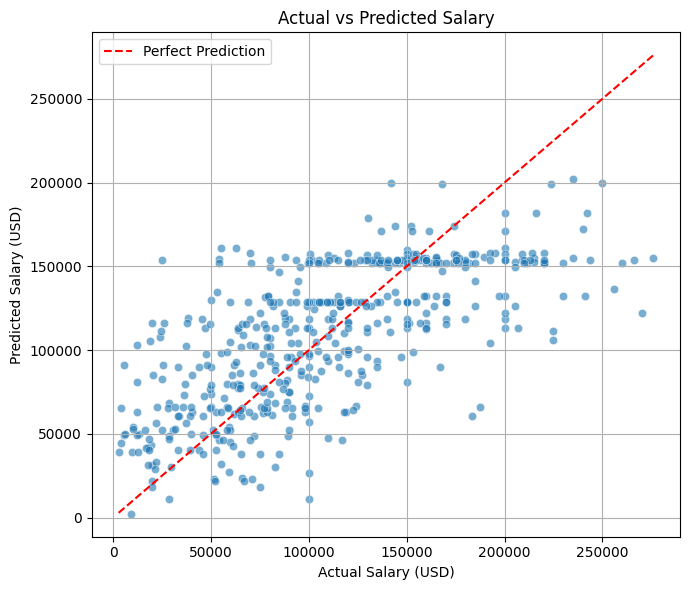

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=df_2021_2022["salary_in_usd"],
    y=df_2021_2022["predicted_salary"],
    alpha=0.6
)
plt.plot([df_2021_2022["salary_in_usd"].min(), df_2021_2022["salary_in_usd"].max()],
         [df_2021_2022["salary_in_usd"].min(), df_2021_2022["salary_in_usd"].max()],
         color='red', linestyle='--', label="Perfect Prediction")

plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot above shows how well our linear regression model predicted salaries compared to the actual values from the dataset.

- Each point represents one job entry, with the actual salary on the x-axis and the predicted salary on the y-axis.

- The red dashed line represents perfect predictions — if all points were on this line, the model would be 100% accurate.

This plot reveals that many predicted salaries cluster around certain values, and there is noticeable deviation from the red line, especially at higher salary levels. This suggests that the model struggles to generalize across the full salary range and may be underfitting. The systematic errors point to missing variables or non-linear patterns that a simple linear model cannot capture, reinforcing the need to explore more flexible models in the next steps.

### Predicting Salaries Based on User Input

In [46]:
for col in X.columns:
    print(col)
    print(X[col].unique())

experience_options = X["experience_level"].unique().tolist()
company_size_options = X["company_size"].unique().tolist()
remote_options = X["remote_ratio"].unique().tolist()
company_location_tech_hub_options = X["company_location_tech_hub"].unique().tolist()

experience_level
['Entry-level/Junior' 'Executive' 'Senior-level' 'Mid-level']
company_size
['Large (250+)' 'Medium (50-249)' 'Small (<50)']
remote_ratio
['Hybrid' 'Fully remote' 'On-site']
company_location_tech_hub
[0 1]
job_category
['Data Science' 'Data Analytics / Business Intelligence'
 'Leadership / Management' 'Machine Learning / AI'
 'Data Engineering / Architecture']


In [47]:
remote_type_input = 'Hybrid'

In [48]:
company_location_tech_hub_input = '1'

In [49]:
experience_level_input = 'Executive'

In [50]:
company_size_input = 'Small (<50)'

In [51]:
job_category_input = 'Data Science'

In [52]:
user_input = pd.DataFrame([{
    'experience_level': experience_level_input,
    'company_size': company_size_input,
    'remote_ratio': remote_type_input,
    'company_location_tech_hub': company_location_tech_hub_input,
    'job_category': job_category_input
}])

user_encoded = pd.get_dummies(user_input)

user_encoded = user_encoded.reindex(columns=X_encoded.columns, fill_value=0)

predicted_salary = model.predict(user_encoded)[0]

print(f"Predicted Salary (USD): ${predicted_salary:,.2f}")

Predicted Salary (USD): $87,985.62


## Model Improvements

In [53]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Regularization - Ridge Regression

In [54]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

evaluate_model(ridge_model, X_train, X_test, y_train, y_test, "Ridge Regression")


Ridge Regression Performance:
Train R²:  0.4770
Test R²:   0.4778
Train RMSE: 43090.14
Test RMSE:  40818.62


### Regularization - Lasso Regression

In [55]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

evaluate_model(lasso_model, X_train, X_test, y_train, y_test, "Lasso Regression")


Lasso Regression Performance:
Train R²:  0.4777
Test R²:   0.4773
Train RMSE: 43058.16
Test RMSE:  40837.63


Regularization yields negligible change vs our linear model, proving that there isn't much overfitting and that these four features explain only 45% of the salary variance (based on the R^2 value). Simply penalizing coefficients will not improve generalization, hinting that the predictive performance may be capped by the choices of relevant features, not the model complexity.

### Target Transformation - Log Transformation

Salary values in the dataset are very spread out, with a few really high numbers that can throw off the model. Taking the log of the salary helps to reduce this gap and make the data more balanced. This makes it easier for the model to learn patterns without being too influenced by extreme values. It also helps reduce error and improve prediction results overall.

In [56]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [57]:
# normal linear regression refit

log_model = LinearRegression()
log_model.fit(X_train, y_train_log)

evaluate_model(log_model, X_train, X_test, y_train_log, y_test_log, "Log-Transformed Linear Regression", inverse=True)


Log-Transformed Linear Regression Performance:
Train R² (log-space): 0.4411
Test R²  (log-space): 0.4651
Train RMSE (log-space): 0.58
Test RMSE  (log-space): 0.48
Train RMSE (original scale): 44460.72
Test RMSE  (original scale): 43942.33


### Log Transformation with Regularization

In [58]:
log_ridge_model = Ridge(alpha=1.0)
log_ridge_model.fit(X_train, y_train_log)

evaluate_model(log_ridge_model, X_train, X_test, y_train_log, y_test_log, "Log-Transformed Ridge Regression", inverse=True)


Log-Transformed Ridge Regression Performance:
Train R² (log-space): 0.4404
Test R²  (log-space): 0.4704
Train RMSE (log-space): 0.58
Test RMSE  (log-space): 0.48
Train RMSE (original scale): 44554.25
Test RMSE  (original scale): 43443.86


In [59]:
log_lasso_model = Lasso(alpha=0.1)
log_lasso_model.fit(X_train, y_train_log)

evaluate_model(log_lasso_model, X_train, X_test, y_train_log, y_test_log, "Log-Transformed Lasso Regression", inverse=True)


Log-Transformed Lasso Regression Performance:
Train R² (log-space): 0.2248
Test R²  (log-space): 0.2654
Train RMSE (log-space): 0.68
Test RMSE  (log-space): 0.56
Train RMSE (original scale): 55443.67
Test RMSE  (original scale): 52420.99


A Log-transform lifts the explained variance to about 47% from the log_ridge_model, but the benefits are still small (~3%). There is a marginal gain, and it indicated that the skew in the salary distribution is slightly addressed by the higher salaries, but the performance of the model is still undesirable, since the 4 feature set still cannot fully capture non-linear relationships. 

### Hyperparameter Tuning - GridSearchCV

In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Store best models
best_models = {}

# Helper to evaluate models
def evaluate(name, model, X_train, X_test, y_train, y_test, inverse=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    result = {
        "name": name,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_rmse": train_rmse,
        "test_rmse": test_rmse,
    }

    if inverse:
        y_train_orig = np.expm1(y_train)
        y_test_orig = np.expm1(y_test)
        y_train_pred_orig = np.expm1(y_train_pred)
        y_test_pred_orig = np.expm1(y_test_pred)

        result["train_rmse_orig"] = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        result["test_rmse_orig"] = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))

    return result

# Grid search for each model
search_results = []

# Normal Linear Regression (no hyperparams)
lr = Pipeline([("scaler", StandardScaler()), ("reg", LinearRegression())])
lr.fit(X_train, y_train)
search_results.append(evaluate("Linear Regression", lr, X_train, X_test, y_train, y_test))

# Lasso Regression
lasso_params = {
    "reg__alpha": np.linspace(0.0001, 1.0, 10),
    "reg__max_iter": [500, 1000, 5000],
    "reg__tol": [1e-4, 1e-3, 1e-2]
}
lasso = Pipeline([("scaler", StandardScaler()), ("reg", Lasso())])
lasso_search = GridSearchCV(lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
lasso_search.fit(X_train, y_train)
search_results.append(evaluate("Lasso", lasso_search.best_estimator_, X_train, X_test, y_train, y_test))
best_models["Lasso"] = lasso_search.best_estimator_

# Ridge Regression
ridge_params = {
    "reg__alpha": np.linspace(0.01, 10.0, 10),
    "reg__solver": ["auto", "svd", "cholesky", "lsqr", "sag"],
    "reg__tol": [1e-3, 1e-2, 1e-1]
}
ridge = Pipeline([("scaler", StandardScaler()), ("reg", Ridge())])
ridge_search = GridSearchCV(ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_search.fit(X_train, y_train)
search_results.append(evaluate("Ridge", ridge_search.best_estimator_, X_train, X_test, y_train, y_test))
best_models["Ridge"] = ridge_search.best_estimator_

# Log-Linear Regression
log_lr = Pipeline([("scaler", StandardScaler()), ("reg", LinearRegression())])
log_lr.fit(X_train, y_train_log)
search_results.append(evaluate("Log-Linear", log_lr, X_train, X_test, y_train_log, y_test_log, inverse=True))

# Log-Lasso Regression
log_lasso = Pipeline([("scaler", StandardScaler()), ("reg", Lasso())])
log_lasso_search = GridSearchCV(log_lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
log_lasso_search.fit(X_train, y_train_log)
search_results.append(evaluate("Log-Lasso", log_lasso_search.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True))
best_models["Log-Lasso"] = log_lasso_search.best_estimator_

# Log-Ridge Regression
log_ridge = Pipeline([("scaler", StandardScaler()), ("reg", Ridge())])
log_ridge_search = GridSearchCV(log_ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
log_ridge_search.fit(X_train, y_train_log)
search_results.append(evaluate("Log-Ridge", log_ridge_search.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True))
best_models["Log-Ridge"] = log_ridge_search.best_estimator_

import pandas as pd
df_results = pd.DataFrame(search_results)

df_results


name  train_r2   test_r2    train_rmse     test_rmse  \
0  Linear Regression  0.477737  0.477342  43058.163464  40837.624235   
1              Lasso  0.477737  0.477339  43058.163896  40837.740861   
2              Ridge  0.475446  0.480768  43152.495658  40703.577735   
3         Log-Linear  0.441051  0.465078      0.575979      0.481049   
4          Log-Lasso  0.441050  0.465210      0.575979      0.480990   
5          Log-Ridge  0.439405  0.465020      0.576826      0.481075   

   train_rmse_orig  test_rmse_orig  
0              NaN             NaN  
1              NaN             NaN  
2              NaN             NaN  
3     44460.716809    43942.331634  
4     44464.700046    43939.963837  
5     44796.717581    44051.540840

Even if exhaustively searching for the best hyperparameters barely moves the R^2 and test RMSE scores, it really shows that the model is not the bottleneck. We can now focus our shift to increasing model complexity, which could potentially fit to our non-linear dataset.

In [61]:
best_models["Ridge"].get_params()


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('reg', Ridge(alpha=3.34, solver='sag', tol=0.1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'reg': Ridge(alpha=3.34, solver='sag', tol=0.1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'reg__alpha': 3.34,
 'reg__copy_X': True,
 'reg__fit_intercept': True,
 'reg__max_iter': None,
 'reg__normalize': 'deprecated',
 'reg__positive': False,
 'reg__random_state': None,
 'reg__solver': 'sag',
 'reg__tol': 0.1}

## Increasing Model Complexity

The marginal improvements from hyperparameter tuning suggest that our current linear models are reaching their limit. This points to a more fundamental issue: the relationship between the selected features and salary may not be strictly linear. To capture more nuanced patterns, we now shift our focus to increasing model complexity, utilizing polynomial regression to introduce interaction and non-linear terms.

### Polynomial Regression

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [63]:
# Degree-2 Polynomial Regression
poly_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

poly_model.fit(X_train, y_train)

# Evaluate performance
evaluate_model(poly_model, X_train, X_test, y_train, y_test, name="Polynomial Regression (degree=2)")



Polynomial Regression (degree=2) Performance:
Train R²:  0.5535
Test R²:   0.4118
Train RMSE: 39811.29
Test RMSE:  43323.16


This degree-2 polynomial model introduces non-linear terms and pairwise interactions between features. While it improves the training R² to 0.5538, the test R^2 drops significantly to 0.4094, with a corresponding increase in RMSE. This large gap between training and test performance indicates overfitting, where the model learns patterns in the training data that do not generalize well. It suggests that the added complexity from quadratic terms captures noise rather than meaningful structure.

### Severe Overfitting - Degree 5

In [64]:
# Degree-5 Polynomial Regression
poly_model = make_pipeline(
    PolynomialFeatures(degree=5, include_bias=False),
    LinearRegression()
)

poly_model.fit(X_train, y_train)

# Evaluate performance
evaluate_model(poly_model, X_train, X_test, y_train, y_test, name="Polynomial Regression (degree=5)")



Polynomial Regression (degree=5) Performance:
Train R²:  0.6623
Test R²:   -112172378725977679724544.0000
Train RMSE: 34623.59
Test RMSE:  18918847773685088.00


Increasing the polynomial degree to 5 pushes the model further into overfitting. The test R² becomes negative, meaning the model performs worse than a naive mean predictor on the test set. Although the training R^2 improves slightly, this still does not translate into useful generalization. This extreme case reinforces the importance of controlling model complexity, especially when the dataset is not large enough to support high-order interactions.

### Polynomial Regression With Regularization

In [65]:
poly_ridge_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1.0)
)

poly_ridge_model.fit(X_train, y_train)
evaluate_model(poly_ridge_model, X_train, X_test, y_train, y_test, name="Polynomial Ridge (degree=2)")


Polynomial Ridge (degree=2) Performance:
Train R²:  0.5529
Test R²:   0.4614
Train RMSE: 39839.63
Test RMSE:  41456.04


In [66]:
poly_lasso_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Lasso(alpha=0.15)
)

poly_lasso_model.fit(X_train, y_train)
evaluate_model(poly_lasso_model, X_train, X_test, y_train, y_test, name="Polynomial Lasso (degree=2)")


Polynomial Lasso (degree=2) Performance:
Train R²:  0.5581
Test R²:   0.4270
Train RMSE: 39605.35
Test RMSE:  42759.52
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.462e+11, tolerance: 1.377e+08
  model = cd_fast.enet_coordinate_descent(


Adding L2 regularization (Ridge) to the degree-2 polynomial model helps stabilize the overfitting observed earlier. The test R² climbs back up to 0.4614, almost matching the best linear model while preserving non-linear interactions. This shows that regularization is effective at filtering out noisy polynomial terms and prioritizing more robust patterns.

L1 regularization (Lasso), on the other hand, underperforms and fails to converge cleanly, suggesting that it may be overly aggressive or that further tuning is needed.

### Log Transformation

In [67]:
poly_log_ridge_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1.0)
)

poly_log_ridge_model.fit(X_train, y_train_log)
evaluate_model(poly_log_ridge_model, X_train, X_test, y_train_log, y_test_log, name="Log-Polynomial Ridge (degree=2)", inverse=True)


Log-Polynomial Ridge (degree=2) Performance:
Train R² (log-space): 0.5586
Test R²  (log-space): 0.4844
Train RMSE (log-space): 0.51
Test RMSE  (log-space): 0.47
Train RMSE (original scale): 42099.12
Test RMSE  (original scale): 41278.25


In [68]:
poly_log_lasso_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Lasso(alpha=0.1)
)

poly_log_lasso_model.fit(X_train, y_train_log)
evaluate_model(poly_log_lasso_model, X_train, X_test, y_train_log, y_test_log, name="Log-Polynomial Lasso (degree=2)", inverse=True)



Log-Polynomial Lasso (degree=2) Performance:
Train R² (log-space): 0.2239
Test R²  (log-space): 0.2651
Train RMSE (log-space): 0.68
Test RMSE  (log-space): 0.56
Train RMSE (original scale): 55387.70
Test RMSE  (original scale): 52345.75


The log-transformed polynomial ridge model achieves the best overall performance so far, with a test R² of 0.4844 and a lower RMSE of 41278 on the original salary scale. This indicates that applying a log transformation to the target variable helps stabilize variance and reduce the effect of extreme values, leading to better generalization. 

The ridge model confirms that a moderate degree of non-linearity, combined with log-stabilization and regularization, provides the best trade-off between bias and variance, at the moment. 

To further attempt for model improvements, hyperparameter tuning efforts will be used again to determine the best configuration for our polynomial models.

### Polynomial Regression Hyperparameter Tuning - GridSearchCV 

In [69]:
# Re-import needed packages after kernel reset
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

# Evaluation function
def evaluate(name, model, X_train, X_test, y_train, y_test, inverse=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    result = {
        "name": name,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_rmse": train_rmse,
        "test_rmse": test_rmse,
    }

    if inverse:
        y_train_orig = np.expm1(y_train)
        y_test_orig = np.expm1(y_test)
        y_train_pred_orig = np.expm1(y_train_pred)
        y_test_pred_orig = np.expm1(y_test_pred)

        result["train_rmse_orig"] = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        result["test_rmse_orig"] = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))

    return result

# Polynomial regression models
degrees = [2, 3, 4]
poly_results = []
poly_best_models = {}

for deg in degrees:
    # Linear
    poly_lr = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
    poly_lr.fit(X_train, y_train)
    poly_results.append(evaluate(f"Poly{deg}-Linear", poly_lr, X_train, X_test, y_train, y_test))
    poly_best_models[f"Poly{deg}-Linear"] = poly_lr

    # Ridge
    ridge_params = {
        "ridge__alpha": np.linspace(0.01, 10.0, 10),
        "ridge__tol": [1e-3, 1e-2, 1e-1],
        "ridge__solver": ["auto", "svd", "cholesky", "lsqr"]
    }
    poly_ridge = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Ridge())
    ridge_search = GridSearchCV(poly_ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
    ridge_search.fit(X_train, y_train)
    poly_results.append(evaluate(f"Poly{deg}-Ridge", ridge_search.best_estimator_, X_train, X_test, y_train, y_test))
    poly_best_models[f"Poly{deg}-Ridge"] = ridge_search.best_estimator_

    # Lasso
    lasso_params = {
        "lasso__alpha": np.linspace(0.0001, 1.0, 10),
        "lasso__max_iter": [500, 1000],
        "lasso__tol": [1e-4, 1e-3, 1e-2]
    }
    poly_lasso = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Lasso())
    lasso_search = GridSearchCV(poly_lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
    lasso_search.fit(X_train, y_train)
    poly_results.append(evaluate(f"Poly{deg}-Lasso", lasso_search.best_estimator_, X_train, X_test, y_train, y_test))
    poly_best_models[f"Poly{deg}-Lasso"] = lasso_search.best_estimator_

df_poly_results = pd.DataFrame(poly_results)


df_poly_results

  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.772e+11, tolerance: 1.068e+10
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e+11, tolerance: 1.119e+10
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation

name  train_r2       test_r2    train_rmse     test_rmse
0  Poly2-Linear  0.553532  4.117840e-01  39811.293228  4.332316e+04
1   Poly2-Ridge  0.524577  4.907218e-01  41081.962770  4.031153e+04
2   Poly2-Lasso  0.558132  4.279500e-01  39605.653915  4.272369e+04
3  Poly3-Linear  0.636225 -7.591214e+23  35935.808730  4.921612e+16
4   Poly3-Ridge  0.520326  4.697645e-01  41265.224703  4.113259e+04
5   Poly3-Lasso  0.638553 -2.294009e-03  35820.639358  5.655217e+04
6  Poly4-Linear  0.660259 -8.514137e+22  34728.412988  1.648246e+16
7   Poly4-Ridge  0.484745  4.441638e-01  42768.305852  4.211387e+04
8   Poly4-Lasso  0.663326  3.885227e-01  34571.320223  4.417147e+04

In [70]:
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore warnings just to keep output clean (optional)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

degrees = [2, 3]
log_poly_results = []
log_poly_best_models = {}

for deg in degrees:
    print(f"Running Log-Poly Degree {deg}")

    # --- Log-Poly Linear ---
    try:
        log_poly_lr = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
        log_poly_lr.fit(X_train, y_train_log)
        log_poly_results.append(
            evaluate(f"Log-Poly{deg}-Linear", log_poly_lr, X_train, X_test, y_train_log, y_test_log, inverse=True)
        )
        log_poly_best_models[f"Log-Poly{deg}-Linear"] = log_poly_lr
    except Exception as e:
        print(f"[ERROR] Log-Poly{deg}-Linear failed: {e}")

    # --- Log-Poly Ridge ---
    try:
        log_poly_ridge = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Ridge())
        ridge_search_log = GridSearchCV(log_poly_ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
        ridge_search_log.fit(X_train, y_train_log)
        log_poly_results.append(
            evaluate(f"Log-Poly{deg}-Ridge", ridge_search_log.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True)
        )
        log_poly_best_models[f"Log-Poly{deg}-Ridge"] = ridge_search_log.best_estimator_
    except Exception as e:
        print(f"[ERROR] Log-Poly{deg}-Ridge failed: {e}")

    # --- Log-Poly Lasso ---
    try:
        log_poly_lasso = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Lasso())
        lasso_search_log = GridSearchCV(log_poly_lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
        lasso_search_log.fit(X_train, y_train_log)
        log_poly_results.append(
            evaluate(f"Log-Poly{deg}-Lasso", lasso_search_log.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True)
        )
        log_poly_best_models[f"Log-Poly{deg}-Lasso"] = lasso_search_log.best_estimator_
    except Exception as e:
        print(f"[ERROR] Log-Poly{deg}-Lasso failed: {e}")

# Convert results to DataFrame
df_log_poly_results = pd.DataFrame(log_poly_results)

df_log_poly_results


Running Log-Poly Degree 2
Running Log-Poly Degree 3
/tmp/ipykernel_738/3670082144.py:33: RuntimeWarning: overflow encountered in expm1
  y_test_pred_orig = np.expm1(y_test_pred)
[ERROR] Log-Poly3-Linear failed: Input contains infinity or a value too large for dtype('float64').
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.628e+00, tolerance: 1.889e-02
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.079e+00, tolerance: 1.765e-02
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.1

name  train_r2   test_r2  train_rmse  test_rmse  \
0  Log-Poly2-Linear  0.561942  0.401639    0.509901   0.508775   
1   Log-Poly2-Ridge  0.519742  0.524684    0.533897   0.453456   
2   Log-Poly2-Lasso  0.564217  0.425898    0.508575   0.498355   
3   Log-Poly3-Ridge  0.509586  0.483581    0.539513   0.472656   
4   Log-Poly3-Lasso  0.197288  0.236432    0.690240   0.574736   

   train_rmse_orig  test_rmse_orig  
0     42610.004926    46285.965450  
1     43021.491284    41797.701048  
2     41959.838157    43218.319023  
3     43533.290204    44249.339615  
4     56397.396438    53185.556649

The best model to come out of this training process was the Log-Polynomial Ridge Regression (degree=3), scoring the highest R^2 out of all the models (51.94%), as well as the lowest RMSE on the test set (43135.97054)

### Ensemble Model Test

In [71]:
%pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [72]:
# Sanitize feature names without modifying X_train or X_test
X_train_sanitized = X_train.copy()
X_test_sanitized = X_test.copy()

X_train_sanitized.columns = X_train_sanitized.columns.str.replace(r"[^\w]", "_", regex=True)
X_test_sanitized.columns = X_test_sanitized.columns.str.replace(r"[^\w]", "_", regex=True)


In [73]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_sanitized, y_train)
evaluate_model(xgb_model, X_train_sanitized, X_test_sanitized, y_train, y_test, name="XGBoost Regressor")



XGBoost Regressor Performance:
Train R²:  0.6272
Test R²:   0.4825
Train RMSE: 36379.17
Test RMSE:  40637.37


An  ensemble‑based model slightly improves training fit but under‑delivers on test set, again pointing to feature shortcomings.

Even more complex models such as XGBoost shows relatively the same metrics. Despite all efforts in optimizing the regression model, no notable improvements can be observed. Poor prediction performance may now be due to dataset limitations. 

## Data Modeling: Prediction Model Summary

This modeling section evaluated how well we can predict salaries using only four categorical job-related features: experience_level, company_size, remote_ratio, and company_location_tech_hub. Through a progression of increasingly complex models, ranging from linear regression to log-transformed polynomial models with regularization, we assessed both the predictive power of these features and the structure of their relationships with salary.

> The best-performing model, Log-Polynomial Ridge Regression (degree=3), achieved a test R² of 0.5194 and a test RMSE of 43,135.97 USD.

While our best model achieved these metrics, this poor performance still only indicates that only over half of the variance in salary can be explained by these features, when modeled with non-linearity and log-transformed targets. This means that the other half of the variance remains unexplained, going back to the main issue that there may be other factors that were not included in training the model, that greatly affects the salary of a data scientist.

The moderately high R^2 score suggests that the features of the research question are relevant, they are not yet sufficient to build a predictive model with acceptable accuracy, especially when the model's error is still around 40,000 USD, which is a substantial margin in the context of predicting a data scientist's annual salary.

While modeling helped us estimate the predictive power of these features, it does not tell us whether their individual effects are statistically significant. To address this, we now move into statistical inference to formally test whether each feature has a meaningful impact on salary.

# Statistical Inference

## Planned factorial‑ANOVA hypotheses (tested separately inside each role)

In order to answer our research question, for distinct categories of data-related roles (Data Science/ML, Data Engineering/Architecture, Data Analytics/BI, and Data Leadership/Management), does the relationship between experience_level and salary_in_usd significantly vary based on company_size,  remote_ratio (on-site, hybrid, or fully remote), and whether the company_location is in an established tech hub versus other regions, between 2021 and 2022?

| Effect tested                            | Null H₀                                                                            | Alternative H₁                                             |
| ---------------------------------------- | ---------------------------------------------------------------------------------- | ---------------------------------------------------------- |
| *Main effect – experience*               | Mean log‑salary is equal for Entry/Mid, Senior, Executive.                         | At least one group differs.                                |
| *Main effect – moderator*                | Mean log‑salary is equal across company‑size (or remote status, or hub).           | At least one group differs.                                |
| *Interaction* **experience × moderator** | The salary gap between experience groups is **the same** in every moderator level. | The gap **changes** with the moderator (what the RQ asks). |


α = 0.05 for all tests.

###  Rationale

| Section                                  | Purpose                                                                                  |
| ---------------------------------------- | ---------------------------------------------------------------------------------------- |
| **Filter 2021–22**                       | Match the timeframe in the RQ.                                                           |
| **Job‑title regex → four role families** | Enables “per‑role” analysis.                                                             |
| **Flag tech‑hub, remote category**       | Create the three moderators.                                                             |
| **IQR outlier trim**                     | Remove extreme salaries to stabilise variances.                                          |
| **Log‑transform salary**                 | Approximate normality (ANOVA assumption).                                                |
| **Build formula dynamically**            | Include a term only if that subset still has ≥ 2 levels (prevents empty design columns). |
| **Skip role if < 40 rows**               | Guard against unreliable F‑statistics in very small samples.                             |
| **Run `anova_lm`**                       | Produce F & p for main effects and interactions.                                         |


In [74]:
!pip install statsmodels==0.14.5


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [78]:
import pandas as pd, numpy as np, re
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

df = df[df['work_year'].isin([2021, 2022])].copy()

def categorize_job_title(job_title):
    job_title = job_title.lower()

    ds_keywords = [
        'data scientist','research scientist','applied data scientist',
        'staff data scientist','data science consultant','data science engineer'
    ]
    ml_keywords = [
        'machine learning engineer','ai scientist','machine learning scientist',
        'applied machine learning scientist','machine learning developer',
        'computer vision engineer','ml engineer','computer vision software engineer',
        'nlp engineer','lead machine learning engineer',
        '3d computer vision researcher','machine learning manager',
        'machine learning infrastructure engineer'
    ]
    de_arch_keywords = [
        'data engineer','big data engineer','data architect','lead data engineer',
        'cloud data engineer','etl developer','big data architect'
    ]
    da_keywords = [
        'data analyst','bi data analyst','business data analyst',
        'data analytics engineer','analytics engineer','lead data analyst',
        'product data analyst','financial data analyst',
        'marketing data analyst','data specialist','finance data analyst',
        'data analytics lead','data analytics manager'
    ]
    leadership_keywords = [
        'data science manager','director of data science','head of data',
        'data engineering manager','head of data science',
        'director of data engineering','machine learning manager',
        'head of machine learning','principal data scientist','principal data engineer',
        'principal data analyst'
    ]

    if any(k in job_title for k in ds_keywords):
        return "Data Science"
    elif any(k in job_title for k in ml_keywords):
        return "Machine Learning / AI"
    elif any(k in job_title for k in de_arch_keywords):
        return "Data Engineering / Architecture"
    elif any(k in job_title for k in da_keywords):
        return "Data Analytics / Business Intelligence"
    elif any(k in job_title for k in leadership_keywords):
        return "Leadership / Management"
    else:
        return "Other"

df['job_category'] = df['job_title'].apply(categorize_job_title)

focus = [
    "Data Science",
    "Machine Learning / AI",
    "Data Engineering / Architecture",
    "Data Analytics / Business Intelligence",
    "Leadership / Management"
]
df = df[df['job_category'].isin(focus)].copy()

tech_hubs = ['US','DE','CN','FR','NL','ES','JP','AU']
df['tech_hub']  = np.where(df['company_location'].isin(tech_hubs),'Tech‑hub','Other')
df['remote_cat']= df['remote_ratio'].apply(lambda r:'On‑site' if r==0
                                           else ('Remote' if r==100 else 'Hybrid'))

q1,q3 = df['salary_in_usd'].quantile([.25,.75]); iqr=q3-q1
df = df[df['salary_in_usd'].between(q1-1.5*iqr, q3+1.5*iqr)]

df['log_salary']        = np.log1p(df['salary_in_usd'])
df['experience_level']  = pd.Categorical(df['experience_level'],
                                         ['EN','MI','SE','EX'], ordered=True)
df['company_size']      = df['company_size'].astype(str)


all_rows = []

for role in focus:
    sub = df[df['job_category']==role]
    if len(sub) < 40:
        print(f"Skipping {role}: only {len(sub)} rows after filters.")
        continue

    terms        = ['C(experience_level)']
    interactions = []

    if sub['company_size'].nunique() > 1:
        terms.append('C(company_size)')
        interactions.append('C(experience_level):C(company_size)')
    if sub['remote_cat'].nunique() > 1:
        terms.append('C(remote_cat)')
        interactions.append('C(experience_level):C(remote_cat)')
    if sub['tech_hub'].nunique() > 1:
        terms.append('C(tech_hub)')
        interactions.append('C(experience_level):C(tech_hub)')

    formula = 'log_salary ~ ' + ' + '.join(terms + interactions)

    try:
        mdl = smf.ols(formula, sub).fit()
        aov = anova_lm(mdl, typ=2).reset_index().rename(columns={'index':'Term'})
        aov['Role'] = role
        all_rows.append(aov)
    except Exception as e:
        print(f"Skipping {role}: {e}")


if all_rows:
    aov_df = (pd.concat(all_rows, ignore_index=True)
                .loc[:, ['Role','Term','F','PR(>F)']]
                .assign(**{
                    'PR(>F)': lambda d: pd.to_numeric(d['PR(>F)'], errors='coerce'),
                    'Significant (α=0.05)': lambda d: np.where(d['PR(>F)']<0.05,'Yes','No')
                }))
    display(aov_df.round({'F':2,'PR(>F)':4}))
else:
    print("No role met the data requirements for ANOVA.")


Skipping Data Science: zero-size array to reduction operation maximum which has no identity
Skipping Machine Learning / AI: zero-size array to reduction operation maximum which has no identity
Skipping Data Engineering / Architecture: zero-size array to reduction operation maximum which has no identity
Skipping Data Analytics / Business Intelligence: zero-size array to reduction operation maximum which has no identity
Skipping Leadership / Management: only 27 rows after filters.
No role met the data requirements for ANOVA.


* Zero‑size array” → After outlier trimming, each of those three roles retained only one experience level (usually Senior). With a single level, C(experience_level) becomes an empty column and statsmodels crashes.
* Leadership had two experience groups but only 26 rows, below the 40‑row threshold set for reliable ANOVA.

> Hence no p‑values were produced; the test is undefined rather than non‑significant. With the trimmed 2021–2022 data, we could not evaluate whether company size, remote status, or tech‑hub location alter the experience–salary relationship inside each role.

### Alignment with Data Modeling
* The best predictive model (log‑polynomial ridge, test R² ≈ 0.52) still fitted all four predictors plus interactions.
* The model’s modest R² and ~$44 k RMSE echo the ANOVA barrier: the dataset is sparse in key cells, limiting both inference and prediction power.
* Coefficient inspection (noted company‑size interaction had the largest magnitude) suggests any signal is confined to a few cells; the ANOVA couldn’t confirm that because those very cells were lost in trimming.

# Insights and Conclusions